# Importing input data

In [96]:
import warnings
warnings.simplefilter('ignore')

In [97]:
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.image as mpimg
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
trump = pd.read_csv('/content/drive/Shared drives/256 Project/tweets_11-06.csv')

In [100]:
trump

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
0,98454970654916608,Republicans and Democrats have both created ou...,f,f,TweetDeck,49,255,2011-08-02 18:07:48
1,1234653427789070336,I was thrilled to be back in the Great city of...,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59
...,...,...,...,...,...,...,...,...
55085,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25
55086,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05
55087,1319444420861829121,RT @TeamTrump: LIVE: Presidential Debate #Deba...,t,f,Twitter for iPhone,0,8197,2020-10-23 01:03:58
55088,1319384118849949702,Just signed an order to support the workers of...,f,f,Twitter for iPhone,176289,36001,2020-10-22 21:04:21


# Converting Data into categorical values for Analysis (Optional)


In [8]:
trump['device'].value_counts()

Twitter for iPhone          26493
Twitter for Android         14545
Twitter Web Client          12182
TweetDeck                     482
TwitLonger Beta               405
Twitter Media Studio          368
Instagram                     133
Facebook                      105
Twitter for BlackBerry         97
Twitter Ads                    97
Twitter Web App                64
Twitter for iPad               60
Twitlonger                     23
Twitter QandA                  10
Vine - Make a Scene            10
Periscope                       7
Neatly For BlackBerry 10        5
Media Studio                    2
Twitter for Websites            1
Twitter Mirror for iPad         1
Name: device, dtype: int64

In [9]:
# Creating a copy(trump_cat) of the original dataset converting all non-categorical columns to categorical columns if needed in the future
trump_cat = trump.copy()

In [10]:
trump_cat["device"] = trump_cat.device.astype('category')
trump_cat["isRetweet"] = trump_cat.isRetweet.astype('category')
trump_cat["isDeleted"] = trump_cat.isDeleted.astype('category')
trump_cat["device"] = trump_cat["device"].cat.codes
trump_cat["isRetweet"] = trump_cat["isRetweet"].cat.codes
trump_cat["isDeleted"] = trump_cat["isDeleted"].cat.codes

In [11]:
trump_cat.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
0,98454970654916608,Republicans and Democrats have both created ou...,0,0,5,49,255,2011-08-02 18:07:48
1,1234653427789070336,I was thrilled to be back in the Great city of...,0,0,18,73748,17404,2020-03-03 01:34:50
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,1,0,18,0,7396,2020-01-17 03:22:47
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,0,0,18,80527,23502,2020-09-12 20:10:58
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,1,0,18,0,9081,2020-01-17 13:13:59


# Processing shortcut/frequent words not in the dictionary

* In this section, we are trying to find out the most frequetly used words in trump's tweets that are emotional and not included in our text2emotion dictionary.

### Data Preprocessing
    * Convert dataframe into corpus

In [12]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn import metrics
from nltk.stem import WordNetLemmatizer 
from nltk import FreqDist

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
def CreateCorpusFromDataFrame(corpusfolder,trump):
    for index, r in trump.iterrows():
        id=r['id']        
        category=r['isRetweet']
        body=r['text']
        fname=str(category)+'_'+str(id)+'.txt'
        corpusfile=open(corpusfolder+'/'+fname,'a')
        corpusfile.write(str(body))
        corpusfile.close()

#CreateCorpusFromDataFrame('/content/drive/Shareddrives/256 Project/cc/',trump)

In [14]:
from nltk.corpus.reader import CategorizedPlaintextCorpusReader
my_corpus=CategorizedPlaintextCorpusReader('/content/drive/Shareddrives/256 Project/cc/',r'.*', cat_pattern=r'(.*)_.*') 
# my_corpus.fileids() <- I expect values from column ID
# my_corpus.categories() <- I expect values from column categories
my_corpus.words() # <- I expect values from column Text


['JOBS', ',', 'JOBS', ',', 'JOBS', '!', 'https', '://', ...]

In [15]:
my_corpus.words('f_1019909066456489986.txt') # search tweet by filedid

['Really', 'big', 'jobs', 'meeting', 'today', 'at', ...]

In [16]:
# extract text one by one
all_text = []
for file_id in my_corpus.fileids():
    all_text.append(my_corpus.words(file_id))

In [17]:
all_text[:5]

[['JOBS', ',', 'JOBS', ',', 'JOBS', '!', 'https', '://', ...],
 ['Really', 'big', 'jobs', 'meeting', 'today', 'at', ...],
 ['“', 'Trump', 'recognized', 'Russian', 'Meddling', ...],
 ['https', '://', 't', '.', 'co', '/', 'Gm9KE8cHpS'],
 ['#', 'StopTheBias', 'https', '://', 't', '.', 'co', ...]]

In [18]:
# pre cleanning part
punc = string.punctuation
stopwords_e = stopwords.words('english') + ['amp','rt', 'via','://','https','"""@','…','...','’','co','realdonaldtrump','http','""','“','"""','."', '--','....','.@','”','.”', '.""','""""""@']
lemmatizer = WordNetLemmatizer() 

In [19]:
# extract every word from text
all_words = []
for w in my_corpus.words():
    all_words.append(w.lower())

In [20]:
# remove puctuation, stop words and some customized words
clean = [word for word in all_words if word not in punc if word not in stopwords_e]

In [21]:
# present the most frequently ysed words in Trump's tweets
frequency = FreqDist(clean)
 
print (frequency.most_common(20))

[('great', 622), ('president', 578), ('trump', 456), ('biden', 437), ('thank', 388), ('people', 356), ('joe', 306), ('vote', 275), ('democrats', 263), ('america', 256), ('new', 246), ('news', 242), ('get', 224), ('american', 218), ('big', 206), ('would', 199), ('country', 196), ('never', 184), ('impeachment', 182), ('one', 176)]


In [22]:
djt_pop = frequency.most_common(8000)

In [23]:
# make a list of trump's most frequently used words
djt = []
for i in range(len(djt_pop)):
    djt.append(djt_pop[i][0])

In [24]:
# define a function for finding out the words in list1 but not in list2
def Diff(li1, li2):
    li_dif = [i for i in li1 if i not in li2]
    return li_dif

In [25]:
# define a fuction that can delet a word from a dataframe, if there is any unappropriate word-emotion pair need to be remove 
def del_word(word,df):
    df = df.drop(df[df['Word']==word].index)
    return df

In [26]:
t2e = pd.read_csv('/content/drive/Shareddrives/256 Project/text2emotion.csv') #<- this is the dictionary we are going to use in our algorithm
t2e_list = t2e['Word'].to_list() # convert it into list 
diff_dict = Diff(djt,t2e_list) # find out the words in trump's popular terms list that is not in t2e dictionary
diff_dict[:5] # list the words that the dictionary didn't include

['president', 'biden', 'thank', 'people', 'joe']

In [27]:
# create a new dataframe for the word-emotion pairs that is specific work for trump's emotion detection and not include in t2e dictionary
new_df = pd.DataFrame([['stupid','Angry'],['coronavirus','Fear'],['recorded','Surprise'],['record','Surprise'],['newest','Surprise'],['new','Surprise'],
                       ['victory','Happy'],['prouder','Happy'],['cages','Fear'],['china', 'Angry'], ['america', 'Happy'],['democrats', 'Angry'],
                       ['biden', 'Angry'],['hillary', 'Angry'],['joe', 'Angry'],['republican', 'Fear'],['clinton', 'Angry'],
                       ['russia', 'Happy'],['senate', 'Angry'],['win', 'Happy'],['usa', 'Happy'],['fbi', 'Fear'],
                       ['makeamericagreatagain', 'Happy'],['congratulations', 'Happy'],['obamacare', 'Angry'],['maga', 'Happy'],
                       ['florida', 'Happy'],['coronavirus', 'Angry'],['carolina','Happy'],['donald','Happy'],['foxandfriends','Happy'],
                       ['golf','Happy'],['ivankatrump','Happy'],['donaldjtrumpjr','Happy'],['won','Happy'],
                       ['fun','Happy']],columns=['Word','Emotion'])

In [28]:
# append new dataframe to old t2e dictionary dataframe. Create the final complete dictionary which is going to use in our algorithm.
fin_dict = t2e.append(new_df)
fin_dict=fin_dict.reset_index().drop(['index'],axis=1)
fin_dict.to_csv('trump_dict.csv',index=False)

##### By adding word-emotion pairs, we increase the accuracy for Trump's tweets emotion detection. Some word-emotion pairs are only make sense for analysing Trump's emotion.

# Base Emotion Extraction algorithm

In [29]:
# Trump_dict includes words from dictionary as well as Trump specific vocabulary
dictionary = pd.read_csv('/content/drive/Shared drives/256 Project/trump_dict.csv')

In [30]:
# Converting the pandas DF to dictionary for quick element wise access.
df = {}
for ind in dictionary.index:
    df[dictionary['Word'][ind]] = dictionary['Emotion'][ind]

In [31]:
def removing_shortcuts(text):
    """This function replaces all the common shorcut words used by their expanded form.""" 

    full_words = []
    shortcuts = {'y': 'why', 'hw': 'how', 'k': 'okay',
                 'idc': "i do not care", 'ty': 'thank you', 'wlcm': 'welcome', 'bc': 'because', 'xoxo': 'love',
                 'ttyl': 'talk to you later', 'bday': 'birthday', 'awsm': 'awesome', 'gud': 'good',
                 'lv': 'love', 'dm': 'direct message', 'rt': 'retweet', 'wtf': 'hate', 'idgaf': 'hate',
                 'irl': 'in real life', 'yolo': 'you only live once', "don't": "do not",
                 "won't": "will not", 'tbh': 'to be honest', 'caj': 'casual', 'Ikr': 'I know, right?',
                 'omw': 'on my way','ofc': 'of course', 'Idc': "I do not care", 'Irl': 'In real life', 'tbf': 'To be fair',
                 'obvs': 'obviously', 'v': 'very', 'atm': 'at the moment',
                 'col': 'crying out loud', 'gbu': 'god bless you', 'gby': 'god bless you', 'gotcha': 'I got you',
                 'hehe': 'laughing', 'haha': 'laughing', 'hf': 'have fun',
                 'hry': 'hurry', 'idc': 'i do not care', 'ikr': 'i know right',
                 'lmao': 'laughing my ass off', 'lol': 'laughing out loud',
                 'n1': 'nice one', 'na': 'not available', 'rip': 'rest in peace',
                 'sry': 'sorry', 'tc': 'take care',
                 'thnks': 'thanks', 'thx': 'thanks', 'thnk': 'thanks', 'ttyl': 'talk to you later',
                 'ugh': 'disgusted'}

    for token in text:
        if token in shortcuts.keys():
            token = shortcuts[token]
        full_words.append(token)
    text = " ".join(full_words)
    return text


def removing_stopwords(text):
    """ Function removes some common occuring texts from the tweets which had no meaning or wasn't intended to imply a particular meaning"""
    
    stop_words = ['pence','retweet','amp','make','realdonaldtrump','myself', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'are', 'was', 'were', 'been', 'being', 'have', 'has', 'had', 'having', 'does', 'did', 'doing', 'the', 'and', 'but', 'because', 'until', 'while', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below','from', 'down', 'out', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'not', 'only', 'own', 'same', 'than', 'too', 'very', 'can', 'will', 'just', "should've", 'now', 'are', 'could', 'did','does', 'had', 'has', 'have', 'might', 'must', 'need', "shall", "should", 'was', "were", "would"]
    return [word for word in text if (word not in stop_words) and (len(word)>2)]


def lemmatization(words_big):
    """ Function performs lemmatixation on the input data only for verb and noun forms 
    without disturbing the adjectives and adverbs which are important for the project. """

    lemma = WordNetLemmatizer()
    stemmed_words = [lemma.lemmatize(word, 'v') for word in words_big]
    stemmed_words = [lemma.lemmatize(word, 'n') for word in stemmed_words]
    return " ".join(stemmed_words)


def removing_not(text):
    """ Function peforms the negation handling using bi-gram approach """

    d = {'not sad': 'Happy', 'not bad': 'Happy', 'not boring': 'Happy', 'not wrong': 'Happy', 'not bored': 'Happy',
         'not jealous': 'Happy', 'not happy': 'Sad', 'not well': 'Sad', 'not suitable': 'Angry', 'not right': 'Angry',
         'not good': 'Sad', 'not excited': 'Angry', 'not funny ': 'Sad', 'not  kind': 'Sad', 'not proud': 'Angry',
         'not cool': 'Angry', 'not funny': 'Angry', 'not kind': 'Angry', 'not open': 'Angry', 'not safe': 'Fear',
         'not enough': 'Empty', 'not know': 'Sad', 'not knowing': 'Sad', 'not believe': 'Angry',
         'not believing': 'Angry',
         'not understand': 'Sad', 'not understanding': 'Sad', 'no doubt': 'Happy', 'not think': 'Sad',
         'not thinking': 'Sad',
         'not recognise': 'Sad', 'not recognising': 'Sad', 'not forget': 'Angry', 'not forgetting': 'Angry',
         'not remember': 'Sad',
         'not remembering': 'Sad', 'not imagine': 'Sad', 'not imagining': 'Sad', 'not mean': 'Sad',
         'not meaning': 'Sad',
         'not agree': 'Angry', 'not agreeing': 'Sad', 'not disagree': 'Happy', 'not disagreeing': 'Happy',
         'not deny': 'Sad',
         'not denying': 'Sad', 'not promise': 'Angry', 'not promising': 'Angry', 'not satisfy': 'Sad',
         'not satisfying': 'Sad',
         'not realise': 'Sad', 'not realising': 'Sad', 'not appear': 'Angry', 'not appearing': 'Angry',
         'not please': 'Sad', 'not pleasing': 'Sad', 'not impress': 'Sad', 'not impressing': 'Sad',
         'not surprise': 'Sad', 'not surprising': 'Sad', 'not concern': 'Sad', 'not concerning': 'Sad',
         'not have': 'Sad', 'not having': 'Sad',
         'not own': 'Sad', 'not owning': 'Sad', 'not possess': 'Sad', 'not possessing': 'Sad', 'not lack': 'Sad',
         'not lacking': 'Sad',
         'not consist': 'Sad', 'not consisting': 'Sad', 'not involve': 'Sad', 'not involving': 'Sad',
         'not include': 'Sad', 'not including': 'Sad', 'not contain': 'Sad',
         'not containing': 'Sad', 'not love': 'Sad', 'not like': 'Angry',
         'not hate': 'Happy', 'not hating': 'Happy', 'not adore': 'Sad', 'not adoring': 'Sad', 'not prefer': 'Sad',
         'not preferring': 'Sad', 'not care': 'Angry', 'not mind': 'Angry', 'not minding': 'Sad',
         'not want': 'Angry', 'not wanting': 'Sad',
         'not need': 'Angry', 'not needing': 'Angry', 'not desire': 'Sad', 'not desiring': 'Sad', 'not wish': 'Sad',
         'not wishing': 'Sad', 'not hope': 'Sad', 'not hoping': 'Sad', 'not appreciate': 'Sad',
         'not appreciating': 'Sad',
         'not value': 'Sad', 'not valuing': 'Sad', 'not owe': 'Sad', 'not owing': 'Sad', 'not seem': 'Sad',
         'not seeming': 'Sad', 'not fit': 'Sad', 'not fitting': 'Sad', 'not depend': 'Sad',
         'not depending': 'Sad', 'not matter': 'Sad', 'not afford': 'Sad', 'not affording': 'Sad', 'not aim': 'Sad',
         'not aiming': 'Sad', 'not attempt': 'Angry', 'not attempting': 'Angry', 'not ask': 'Angry',
         'not asking': 'Angry', 'not arrange': 'Angry', 'not arranging': 'Angry', 'not beg': 'Angry',
         'not begging': 'Angry', 'not begin': 'Angry', 'not beginning': 'Angry', 'not caring': 'Angry',
         'not choose': 'Angry', 'not choosing': 'Angry', 'not claim': 'Angry', 'not claiming': 'Angry',
         'not consent': 'Angry', 'not consenting': 'Angry', 'not continue': 'Angry', 'not continuing': 'Angry',
         'not dare': 'Angry', 'not daring': 'Angry', 'not decide': 'Sad',
         'not deciding': 'Sad', 'not demand': 'Angry', 'not demanding': 'Angry', 'not deserve': 'Angry',
         'not deserving': 'Angry', 'not expect': 'Angry',
         'not expecting': 'Angry', 'not fail': 'Happy', 'not failing': 'Happy', 'not get': 'Sad', 'not getting': 'Sad',
         'not hesitate': 'Sad', 'not hesitating': 'Sad', 'not hurry': 'Happy', 'not hurrying': 'Happy',
         'not intend': 'Sad', 'not intending': 'Sad', 'not learn': 'Angry', 'not learning': 'Angry',
         'not liking': 'Angry', 'not loving': 'Sad', 'not manage': 'Angry',
         'not managing': 'Angry', 'not neglect': 'Sad', 'not neglecting': 'Sad', 'not offer': 'Angry',
         'not offering': 'Angry',
         'not plan': 'Angry', 'not planing': 'Angry', 'not prepare': 'Angry',
         'not preparing': 'Angry', 'not pretend': 'Angry', 'not pretending': 'Angry', 'not proceed': 'Angry',
         'not proceeding': 'Angry',
         'not propose': 'Angry', 'not proposing': 'Sad', 'not refuse': 'Sad', 'not refusing': 'Sad',
         'not start': 'Sad',
         'not starting': 'Sad', 'not stop': 'Happy', 'not stopping': 'Happy', 'not struggle': 'Angry',
         'not struggling': 'Angry',
         'not swear': 'Angry', 'not swearing': 'Angry', 'not threaten': 'Happy', 'not threatening': 'Happy',
         'not try': 'Angry', 'not trying': 'Angry', 'not volunteer': 'Angry',
         'not volunteering': 'Angry', 'not wait': 'Angry', 'not waiting': 'Angry', 'not feel': 'Sad',
         'not feeling': 'Sad'}

    f = re.findall("not\s\w+", text)
    for i in f:
        try:
            text = text.replace(i, d[i])
        except:
            pass
    text = text.lower()
    return text


def determine_not(text):
    """Function performs negation handling using the new improved approach"""

    not_location  = text.find('not') + 4
    d = 0
    for j in text[not_location:].split():
        if j in df:
            opposite = {"Happy": "sad", "Angry": "pleased", "Surprise": "expected", "Sad": "happy", "Fear": "calm"}
            text = re.sub(rf'not(.*){j}', opposite[df[j]], text)
            d = 1
            break
        if '.' in j:
            d = 1
            break
    if d == 0:
      text = text.replace(' not',"")
    return text


def removing_contradictions(text):
    """Function replaces all the negation words with 'not'"""

    if text.count("n't"):
        text = text.replace("n't", " not")
    text = re.sub("ai\snot", "am not", text)
    text = re.sub("wo\snot", "will not", text)
    return text

def cleaning(text):
    """Data pre-processing function that takes text as input and cleans it for the algorithm"""

    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = removing_contradictions(text)
    text = removing_not(text)
    text = text.split()
    text = removing_shortcuts(text)
    if "not" in text.split():
        text = determine_not(text)
    if "not" in text.split():
        text = determine_not(text)
    text = re.sub(r"[^a-zA-Z\'!]+", ' ', text)
    text = word_tokenize(text)
    words_big = removing_stopwords(text)
    clean_text = lemmatization(words_big)
    clean_text = re.sub('\s+',' ',clean_text)
    return clean_text



def get_emotion(input,weights=[1,1,1,1,1]):
    """ Functions returns the emotions attached with the input text string """

    text = cleaning(input).split()
    emotion_values = []
    emotions = {"Happy": 0, "Angry": 0, "Surprise": 0, "Sad": 0, "Fear": 0}
    y = 0
    try:
        for i in text:
            try:
                emotions[df[i]] += 1
            except:
                pass
        emotions['Happy'] *= weights[0] 
        emotions['Angry'] *= weights[1] 
        emotions['Surprise'] *= weights[2] 
        emotions['Sad'] *= weights[3] 
        emotions['Fear'] *= weights[4]
        if sum(emotions.values()) == 0:
            return emotions
        for i in emotions:
            emotion_values.append(round((emotions[i] / sum(emotions.values())), 2))
        for j in emotions:
            emotions[j] = emotion_values[y]
            y += 1
        return emotions
    except:
        pass

In [32]:
help(removing_shortcuts)

Help on function removing_shortcuts in module __main__:

removing_shortcuts(text)
    This function replaces all the common shorcut words used by their expanded form.



Key Features of the improved Alogrithm:

1.   Shifting from list based word corpus to dictionary resulted in improved response time. O(n) to O(1) Search time
2.   Reduced keywords in stopwords and shortcuts to optimise response.
3.   Refracting code making it more generalized while having minimal impact on excecution time.
4.   Adding dataset based "Trump weights" to improve prediction

# Need for a better negation Handling

In [33]:
count = 0
for ind in trump.index:
    text = trump['text'][ind]
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = removing_contradictions(text)
    text = removing_not(text)
    text = text.split()
    text = removing_shortcuts(text)
    if "not" in text.split():
        count +=1

print(f"The number of unprocessed negation words for normal text2emotion algorithm: {count}")

The number of unprocessed negation words for normal text2emotion algorithm: 4719


This shows that ~ 10% of the tweets still have unhandled negation 

In [34]:
count = 0
for ind in trump.index:
    text = trump['text'][ind]
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = removing_contradictions(text)
    text = removing_not(text)
    text = text.split()
    text = removing_shortcuts(text)
    if "not" in text.split():
        text = determine_not(text)
    if "not" in text.split():
        text = determine_not(text)
    if "not" in text.split():
        count +=1

print(f"The number of unprocessed negation words after applying the new algorithm: {count}")

The number of unprocessed negation words after applying the new algorithm: 1123


This enhancement helps in reducing the negation issue to less than 3% 

# Comparison of the new algorithm with text2emotion library


In [35]:
#!pip install text2emotion
import text2emotion as te

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
# Cleaning function already present in text2emotion
clean_tw = []
for ind in trump.index:
    clean_tw.append(cleaning(trump['text'][ind]))


In [37]:
import time
start = time.time()
for i in range(1000):
    te.get_emotion(clean_tw[i])
end = time.time()
excecution_time = end - start
print(f"Time required for text2emotion algorithm to compute emotions for 1000 tweets: {excecution_time}")

Time required for text2emotion algorithm to compute emotions for 1000 tweets: 32.50008583068848


In [38]:
import time
start = time.time()
for i in range(1000):
    get_emotion(clean_tw[i])
end = time.time()
excecution_time = end - start
print(f"Time required for the new algorithm to compute emotions for 1000 tweets: {excecution_time}")

Time required for the new algorithm to compute emotions for 1000 tweets: 0.24042201042175293


In [39]:
k = 5
print(clean_tw[k])
print(te.get_emotion(clean_tw[k]))
print(get_emotion(clean_tw[k]))


whitehouse president announce historic step protect constitutional right pray public school
{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.67}
{'Happy': 0.67, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.33}


In [40]:
# This blocks shows the words that impact the outcome of the algorithm.
# In this example since we know that Maga in Trump's vocabulary here means Make America Great again and adds
text  = cleaning(clean_tw[k])
print(text)
for i in text.split():
  if i in df.keys():
    print(i,df[i])

whitehouse president announce historic step protect constitutional right pray public school
protect Happy
right Happy
pray Fear


# Base Visualization

In [41]:
def func(pct, allvalues): 
    #absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n".format(pct) 

In [42]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt


def pie_and_tweet(input_data,text):
    labels = list(input_data.keys())
    values = list(input_data.values())
    colors = ['b', 'r', 'g', 'y', 'c']
    explode = (0.1, 0.1, 0.1, 0.1, 0.1)
    #fig  = figure(facecolor='white')
    fig, ax = plt.subplots(nrows = 1, ncols =2,figsize=(20, 10),gridspec_kw={'width_ratios': [3, 1]})
    ax[1].pie(values,autopct = lambda pct: func(pct, values), colors=colors, labels= labels,explode=explode,counterclock=False, shadow=True)
    ax[1].set_title("Distribution of Emotions",fontsize='20', color='black')
    ax[1].legend(labels,loc=1)
    #plt.show()
    a = []
    while len(text) > 90:
        location = text[:90].rfind(' ')
        a.append(text[:location])
        text = text[location+1:]
    a.append(text)
    img = Image.open('/content/drive/Shared drives/256 Project/tweet.png')
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype('/content/drive/Shared drives/256 Project/arial.ttf', 20)
    for i in range(len(a)):
        draw.text((50,i*35+150), a[i], (0,0,0), font=font)
    font = ImageFont.truetype('/content/drive/Shared drives/256 Project/arial.ttf', 28)
    # Add the actual data value here from the database
    draw.text((40,295), "12:00 AM - 15 Dec 2016", (105,105,105), font=font)    
    #im = img.save("1.png")
    ax[0].imshow(img)
    plt.tight_layout()
    plt.show()

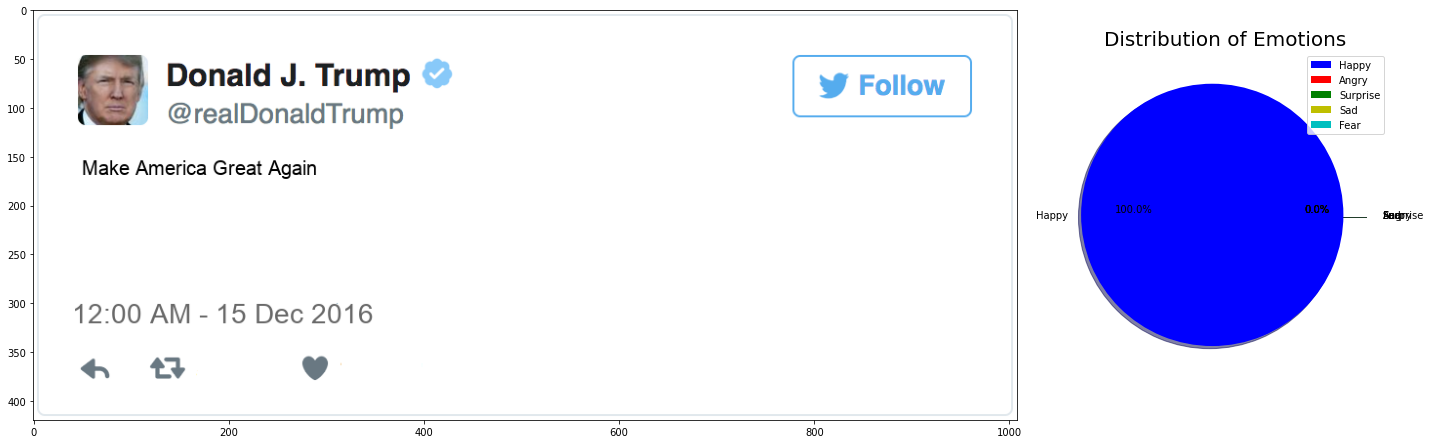

In [43]:
pie_and_tweet(get_emotion("Make America Great Again"),"Make America Great Again")

# Topic Modeling

* In this section, we are going to analyze the main topics of Trump's tweets. And detect the emotions under those topics.

In [44]:
#!pip install pyldavis
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [45]:
# We are going to use unigram and bigram and using clean data for bagging
tf_vectorizer = CountVectorizer(ngram_range=(1,2),max_df = 0.5,min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(clean_tw)
print(dtm_tf.shape)

(55090, 8952)


In [46]:
# We only want to focus on the top 5 topics. I tried use 10 components, the topics after 5th are kind overlapping and terms are shown before.
lda_tf = LatentDirichletAllocation(n_components=5, random_state=0)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [47]:
# use tsne to perfectly seperate 5 topics
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  26.020913
2       51.163364 -159.968018       2        1  24.974318
3      -73.144554   21.523815       3        1  17.314356
1      -66.410133 -110.606438       4        1  17.186096
0       54.417324   12.443444       5        1  14.504317, topic_info=           Term         Freq        Total Category  logprob  loglift
3198      great  7365.000000  7365.000000  Default  30.0000  30.0000
8076      trump  7856.000000  7856.000000  Default  29.0000  29.0000
7665      thank  5811.000000  5811.000000  Default  28.0000  28.0000
2112     donald  1876.000000  1876.000000  Default  27.0000  27.0000
5247       news  1774.000000  1774.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
5998  president   455.578610  4647.139428   Topic5  -5.2949  -0.3917
5698     people   416.520722  3327.829200   Topic5  -5.3845  -0.1474
1731        day   337.672292  1392.254868   Topic5  -5.5944   0.5141
7292      state   357.122912  2058.550842   Topic5  -5.5384   0.1790
8901       year   352.653141  2041.454435   Topic5  -5.5510   0.1748

[366 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
2         4  0.995156               abc
80        2  0.993718       adam schiff
116       1  0.989432  african american
161       5  0.992160       alexsalmond
229       2  0.998892         amendment
...     ...       ...               ...
8901      2  0.227779              year
8901      3  0.105807              year
8901      4  0.068089              year
8901      5  0.172916              year
8936      4  0.991433         york time

[746 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 2, 1])

## 1. Get relative tweets for a Topic

* Based on the topic modeling results, we are going to do further emotion detection

In [48]:
vis = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='tsne')
trump_topic_info = vis.topic_info

In [49]:
# the topic information of Trump's tweets. For each topic, it contain top 30 terms of it.
trump_topic_info

,Term,Freq,Total,Category,logprob,loglift
3198,great,7365.000000,7365.000000,Default,30.0000,30.0000
8076,trump,7856.000000,7856.000000,Default,29.0000,29.0000
7665,thank,5811.000000,5811.000000,Default,28.0000,28.0000
2112,donald,1876.000000,1876.000000,Default,27.0000,27.0000
5247,news,1774.000000,1774.000000,Default,26.0000,26.0000
...,...,...,...,...,...,...
5998,president,455.578610,4647.139428,Topic5,-5.2949,-0.3917
5698,people,416.520722,3327.829200,Topic5,-5.3845,-0.1474
1731,day,337.672292,1392.254868,Topic5,-5.5944,0.5141
7292,state,357.122912,2058.550842,Topic5,-5.5384,0.1790


In [50]:
# Find top 10 terms for a specific topic
def get_top10_terms(topicnum,topic_info):
    topic = topic_info[topic_info['Category']==topicnum]
    top10 = topic.sort_values(by=['Freq'],ascending=False)[:10]
    #term_df = top10['Term']
    return top10

# Get tweets that include most frequently shows 10 terms
def get_topic_tw(topicnum,topic_info): 
    term_list = get_top10_terms(topicnum,topic_info)['Term'].tolist()
    tw_list = []
    for i in trump['text'].index:
        for j in range(9):
            if(trump['text'][i].find(term_list[j]) != -1):
                tw_list.append(trump['text'][i])
                break
    return tw_list

# Detect the emotions of above collected tweets
def topic_emo_detect(topicnum,topic_info,Happy,Angry,Surprise,Sad,Fear):
    tw_list = get_topic_tw(topicnum,topic_info)
    for i in range(len(tw_list)):
        emo = get_emotion(tw_list[i])
        Happy += emo.get('Happy')
        Angry += emo.get('Angry')
        Surprise += emo.get('Surprise')
        Sad += emo.get('Sad')
        Fear += emo.get('Fear')
    return Happy,Angry,Surprise,Sad,Fear

In [51]:
get_top10_terms('Default',trump_topic_info)

,Term,Freq,Total,Category,logprob,loglift
8076,trump,7856.0,7856.0,Default,29.0,29.0
3198,great,7365.0,7365.0,Default,30.0,30.0
7665,thank,5811.0,5811.0,Default,28.0,28.0
1537,country,2651.0,2651.0,Default,20.0,20.0
1851,democrat,2287.0,2287.0,Default,3.0,3.0
8506,vote,2269.0,2269.0,Default,24.0,24.0
7292,state,2058.0,2058.0,Default,14.0,14.0
8750,win,2027.0,2027.0,Default,19.0,19.0
2112,donald,1876.0,1876.0,Default,27.0,27.0
6655,run,1811.0,1811.0,Default,16.0,16.0


In [52]:
topic_emo_detect('Topic1',trump_topic_info,0,0,0,0,0)

(2567.639999999961,
 845.900000000004,
 2617.109999999947,
 2257.3299999999945,
 3304.9199999999423)

## 2.Plot the Emotion Distribution and popular terms
    * After we get the tweets include hot terms for specific topic. We are going to get emotions from these tweets and accumulate different emotions' scores. Visualize our results.

In [53]:
import matplotlib.pyplot as plt 

def plot_topic_emotion(topicnum,topic_info):
    
    # pie plot for top 10 terms in this topic    
    t1 = get_top10_terms(topicnum,topic_info)

    my_data = t1['Freq'].head(10)
    my_labels = t1['Term'].head(10)
    plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
    plt.title('Top 10 Terms in '+topicnum)
    plt.axis('equal')
    plt.show()
  
    
    # bar chart for emotions distribution for this topic
    emotions_value = []
    for i in range(5):
        emotions_value.append(round(topic_emo_detect(topicnum,topic_info,0,0,0,0,0)[i]))
        
    labels = ["Happy", "Angry", "Surprise", "Sad", "Fear"]
    

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10,8))
    rects1 = ax.bar(x - width/2, emotions_value, width,alpha=0.5)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Emotion Distribution of Trump Tweets '+topicnum)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)

    fig.tight_layout()

    plt.show()

#### Let's take a look at the emotion distribution of different topics

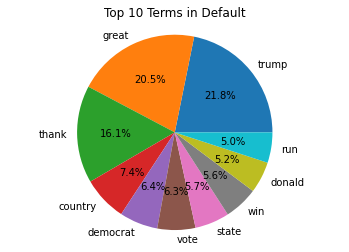

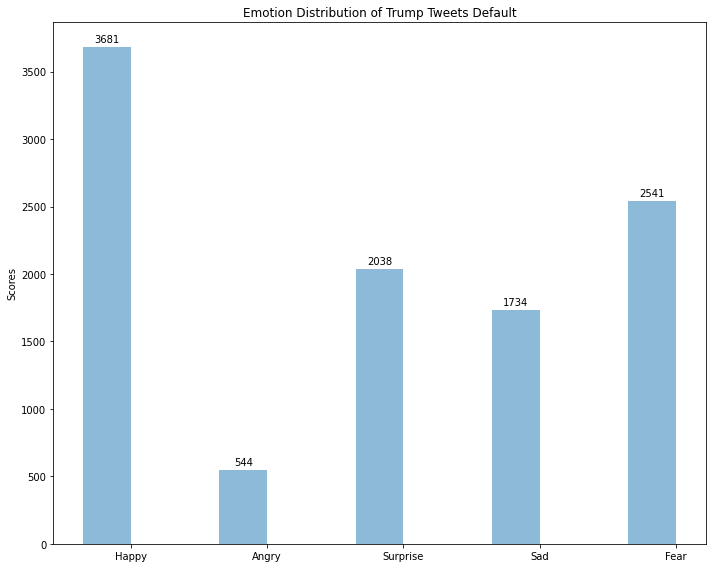

In [54]:
plot_topic_emotion('Default',trump_topic_info)

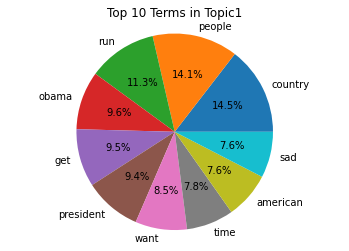

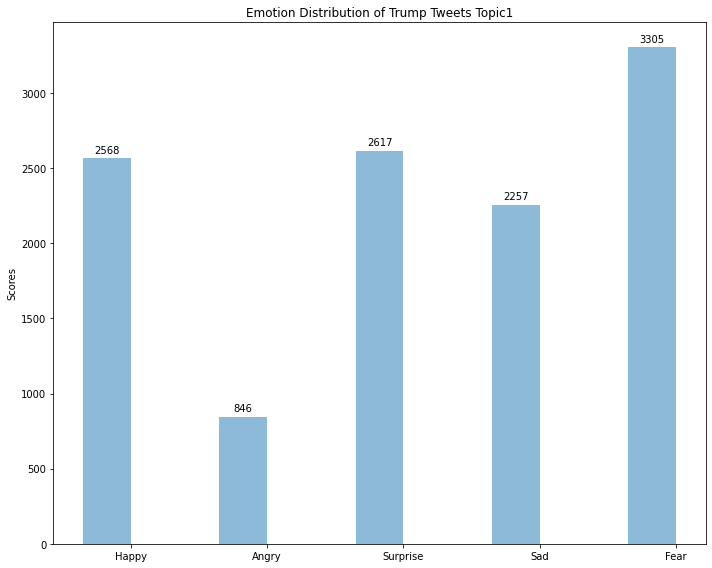

In [55]:
plot_topic_emotion('Topic1',trump_topic_info)

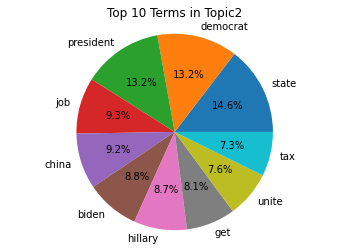

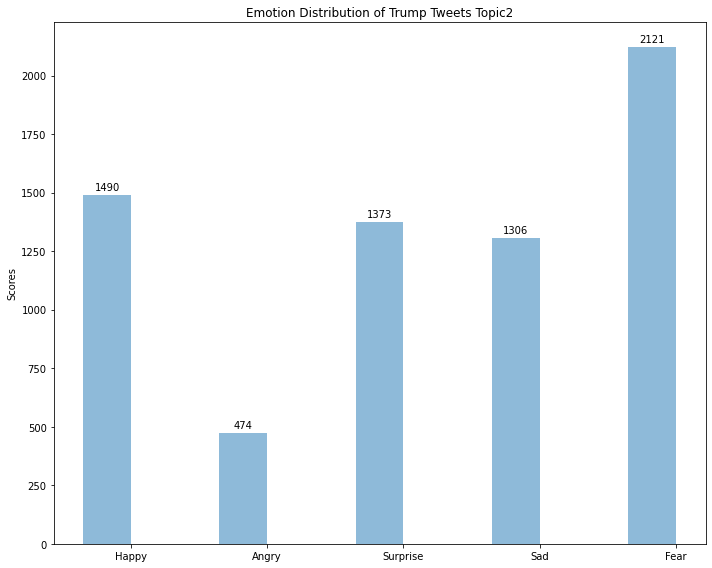

In [56]:
plot_topic_emotion('Topic2',trump_topic_info)

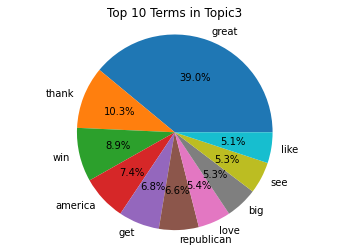

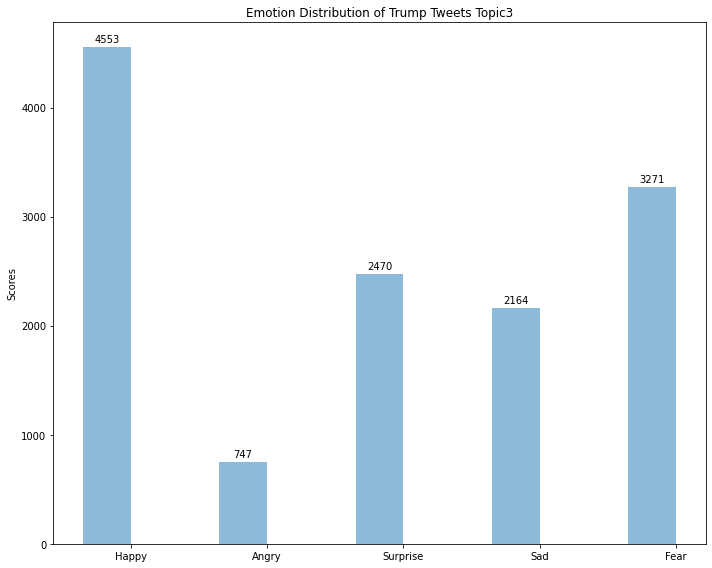

In [57]:
plot_topic_emotion('Topic3',trump_topic_info)

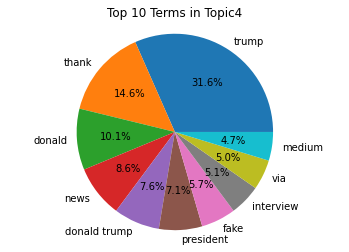

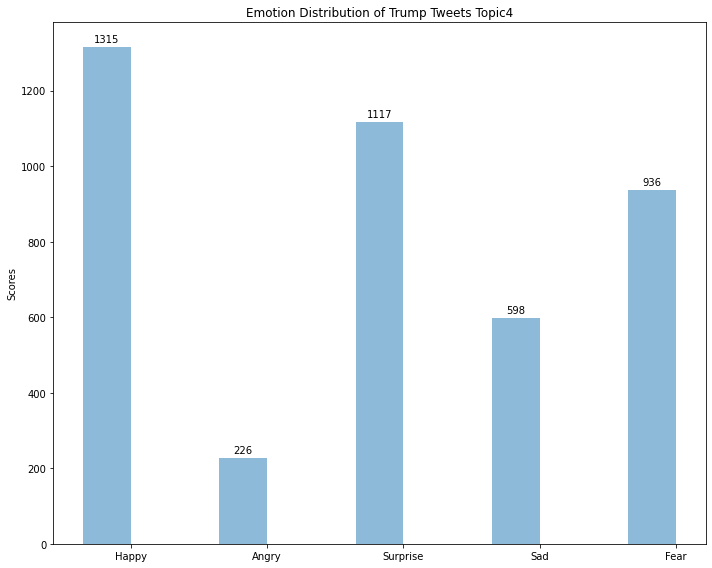

In [58]:
plot_topic_emotion('Topic4',trump_topic_info)

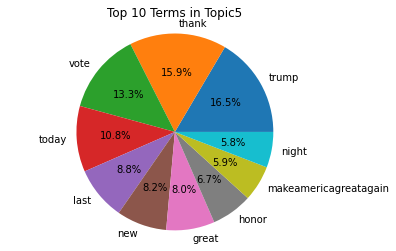

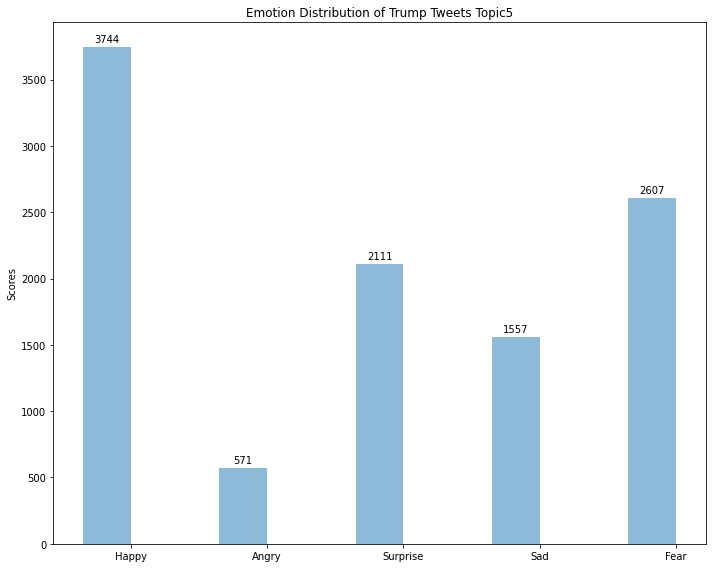

In [59]:
plot_topic_emotion('Topic5',trump_topic_info)

### In general, Trump is very happy when he tweets. He mentioned a lot about himself, a lot of thanks and maga. We couldn't see obvious variation of emotion from topic to topic, it might because the most frequent terms in every topic are quite similar(trump, greate, donald, president...). So we decide to choose specific words (especially nouns in the topic). And detect the emotions regarding these words.

### The selection of words is important, and it should show Trump's intentions when using them, so I decided to use association rule mining to find words that are highly associated.



# Associated words emotion detection

In [60]:
# for words
import matplotlib.pyplot as plt 

def get_words_tw(word,clean_twt): 
    tw_list = []
    for i in range(len(clean_twt)):
        if(clean_tw[i].find(word) != -1):
            tw_list.append(clean_tw[i])
    return tw_list

# Detect the emotions of above collected tweets
def words_emo_detect(word,clean_twt,Happy,Angry,Surprise,Sad,Fear):
    tw_list = get_words_tw(word,clean_twt)
    for i in range(len(tw_list)):
        emo = get_emotion(tw_list[i])
        Happy += emo.get('Happy')
        Angry += emo.get('Angry')
        Surprise += emo.get('Surprise')
        Sad += emo.get('Sad')
        Fear += emo.get('Fear')
    return Happy,Angry,Surprise,Sad,Fear

# Plot the Emotion Distribution for choosing words
def plot_words_emotion(words_list,clean_twt):


    # bar chart for emotions distribution for selected words list\
    value1 = []
    for i in range(5):
        value1.append(round(words_emo_detect(words_list[0],clean_twt,0,0,0,0,0)[i]))
    value2 = []
    for i in range(5):
        value2.append(round(words_emo_detect(words_list[1],clean_twt,0,0,0,0,0)[i]))
    value3 = []
    for i in range(5):
        value3.append(round(words_emo_detect(words_list[2],clean_twt,0,0,0,0,0)[i]))
        
    fig, ax = plt.subplots(figsize=(10,8))
    labels = ["Happy", "Angry", "Surprise", "Sad", "Fear"]
    x = np.arange(len(labels))  # the label locations
    width = 0.3  # the width of the bars
    
    rects1 = ax.bar(x - width/3, value1, width, label=words_list[0],alpha=0.5)
    rects2 = ax.bar(x + 2*width/3, value2, width, label=words_list[1],alpha=0.5)
    rects3 = ax.bar(x + 1.66*width, value3, width, label=words_list[2],alpha=0.5)
    
        
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title('Emotion Distribution of words : ')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)


    plt.show()

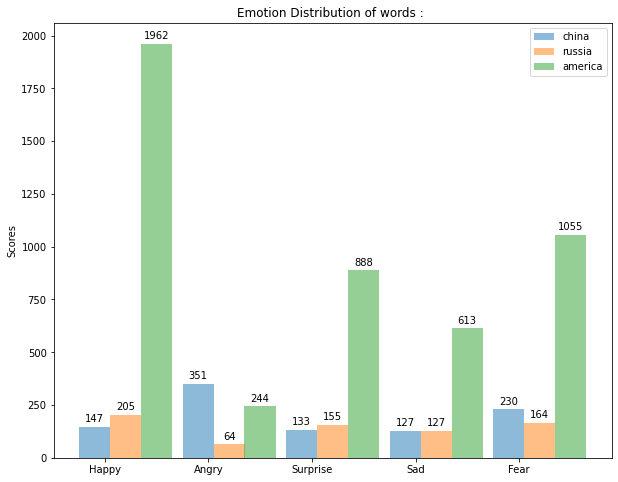

In [61]:
list1 = ['china','russia','america']
plot_words_emotion(list1,clean_tw)

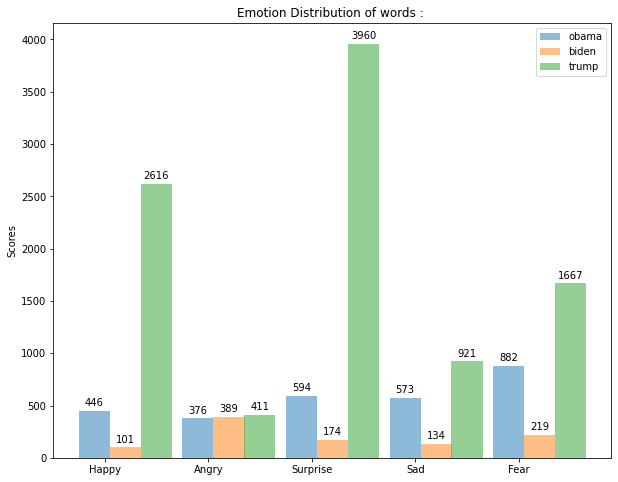

In [62]:
list2 = ['obama','biden','trump']
plot_words_emotion(list2,clean_tw)

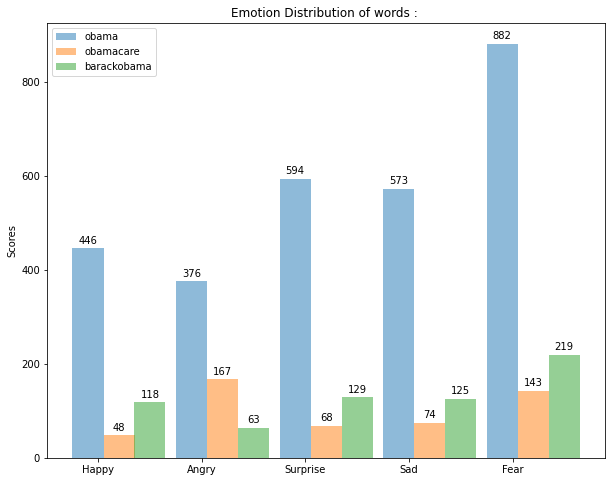

In [63]:
list3 = ['obama','obamacare','barackobama']
plot_words_emotion(list3,clean_tw)

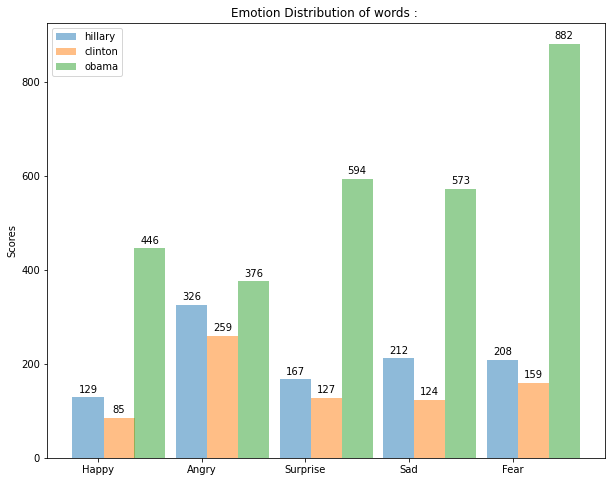

In [64]:
list4 = ['hillary','clinton','obama']
plot_words_emotion(list4,clean_tw)

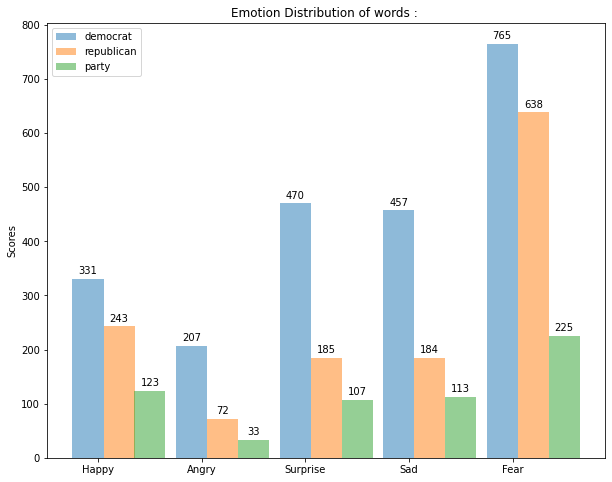

In [65]:
list5 = ['democrat','republican','party']
plot_words_emotion(list5,clean_tw)

# ReTweet content analysis

In [66]:
retw = trump[trump['isRetweet']=='t']
retw

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59
5,1217962723234983937,RT @WhiteHouse: President @realDonaldTrump ann...,t,f,Twitter for iPhone,0,25048,2020-01-17 00:11:56
12,1319496349092511744,RT @EricTrump: https://t.co/NcrNdOSfIV,t,f,Twitter for iPhone,0,8921,2020-10-23 04:30:19
13,1236502342121541632,RT @GOPChairwoman: The economic boom continues...,t,f,Twitter for iPhone,0,8681,2020-03-08 04:01:46
...,...,...,...,...,...,...,...,...
55083,1212165147902578688,RT @heatherjones333: DEAR STUPID PEOPLE- PEACE...,t,f,Twitter for iPhone,0,8034,2020-01-01 00:14:26
55084,1212165019053494272,RT @heatherjones333: 'We Have Taken Appropriat...,t,f,Twitter for iPhone,0,5336,2020-01-01 00:13:56
55085,1319485303363571714,RT @RandPaul: I don’t know why @JoeBiden think...,t,f,Twitter for iPhone,0,20683,2020-10-23 03:46:25
55086,1319484210101379072,RT @EliseStefanik: President @realDonaldTrump ...,t,f,Twitter for iPhone,0,9869,2020-10-23 03:42:05


In [67]:
clean_retw = []
for ind in retw.index:
    clean_retw.append(cleaning(retw['text'][ind]))

dtm_tf_re = tf_vectorizer.fit_transform(clean_retw)
lda_tf.fit(dtm_tf_re)
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf_re, tf_vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  25.279318
1       51.163364 -159.968018       2        1  21.798975
3      -73.144554   21.523815       3        1  20.106311
2      -66.410133 -110.606438       4        1  17.476771
0       54.417324   12.443444       5        1  15.338624, topic_info=             Term         Freq        Total Category  logprob  loglift
1317    president  1496.000000  1496.000000  Default  30.0000  30.0000
1946   whitehouse   681.000000   681.000000  Default  29.0000  29.0000
813   impeachment   369.000000   369.000000  Default  28.0000  28.0000
415      democrat   683.000000   683.000000  Default  27.0000  27.0000
74       american   621.000000   621.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1834        trump    94.984956  1222.097463   Topic5  -4.8589  -0.6798
1671        state    60.354942   315.795637   Topic5  -5.3124   0.2199
1534          say    60.149644   427.458387   Topic5  -5.3158  -0.0862
1793        today    59.243842   412.736114   Topic5  -5.3309  -0.0664
1150         news    52.406095   253.086323   Topic5  -5.4536   0.3001

[329 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
5         2  0.031937        abuse
5         3  0.031937        abuse
5         4  0.814401        abuse
5         5  0.111781        abuse
6         4  0.982948  abuse power
...     ...       ...          ...
1985      2  0.155713         year
1985      3  0.221974         year
1985      4  0.139148         year
1985      5  0.009939         year
1991      4  0.989245         york

[574 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 4, 3, 1])

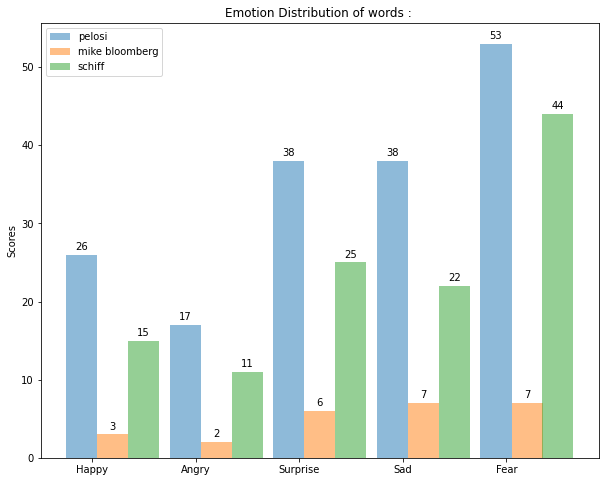

In [68]:
# Nancy Pelosi - Democratic / Adam Schiff - Democratic / mike bloomberg - a candidate for the 2020 Democratic Party nomination for President of the United States.
retw2 = ['pelosi','mike bloomberg','schiff']
plot_words_emotion(retw2,clean_retw)

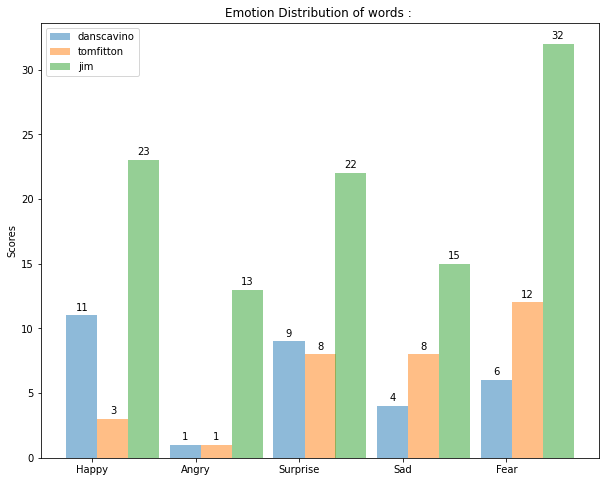

In [69]:
# Dan Scavino : Assistant to the President and Deputy Chief of Staff for Communications
# Tom Fitton is known for pro-Trump commentary.
# Jim Jordan :A close ally of President Donald Trump, Jordan is a founding member of the Freedom Caucus and chaired the Caucus from its establishment in 2015 until 2017.

retw1 = ['danscavino','tomfitton','jim']
plot_words_emotion(retw1,clean_retw)

# What he deleted?!

In [70]:
del_tw = trump[trump['isDeleted']=='t']
del_tw

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
1243,1243756098965946368,RT @BrandonBeckham_: @realDonaldTrump 🇺🇸 We've...,t,t,Twitter for iPhone,0,6039,2020-03-28 04:25:36
1244,1243878883931435010,....very often FAKE NEWS. Lamestream Media sho...,f,t,Twitter for iPhone,33711,8006,2020-03-28 12:33:30
1245,1234727146964254721,Australia’s Central Bank cut interest rates an...,f,t,Twitter for iPhone,2468,703,2020-03-03 06:27:46
1246,1223724802306977799,RT @IamAllOutOfGum: @Lrihendry @PlaysTrumpCard...,t,t,Twitter for iPhone,0,4907,2020-02-01 21:48:23
1247,1223725980314939393,"Such a great, common sense, question. Crazy! h...",f,t,Twitter for iPhone,103676,26003,2020-02-01 21:53:04
...,...,...,...,...,...,...,...,...
54987,1083009519503003648,Billions of dollars are sent to the State of C...,f,t,Twitter for iPhone,30626,7635,2019-01-09 02:36:05
55060,1215285845336502272,STOCK MARKET AT ALL-TIME HIGH! HOW ARE YOUR 40...,f,t,Twitter for iPhone,38281,7685,2020-01-09 02:54:59
55064,1213145424795705344,"....followed, and then it was withdrawn. The D...",f,t,Twitter for iPhone,7013,1941,2020-01-03 05:09:43
55065,1213145418944667649,....different places that he thought were wast...,f,t,Twitter for iPhone,4559,1262,2020-01-03 05:09:41


In [71]:
clean_del = []
for ind in del_tw.index:
    clean_del.append(cleaning(del_tw['text'][ind]))

dtm_tf_del = tf_vectorizer.fit_transform(clean_del)
lda_tf.fit(dtm_tf_del)
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf_del, tf_vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  23.505386
2       51.163364 -159.968018       2        1  22.427549
4      -73.144554   21.523815       3        1  22.423920
3      -66.410133 -110.606438       4        1  18.304739
0       54.417324   12.443444       5        1  13.338407, topic_info=          Term        Freq       Total Category  logprob  loglift
251      trump  135.000000  135.000000  Default  30.0000  30.0000
225      state   69.000000   69.000000  Default  29.0000  29.0000
184  president  116.000000  116.000000  Default  28.0000  28.0000
99       great  138.000000  138.000000  Default  27.0000  27.0000
75        fake   52.000000   52.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
30       china   13.288539   49.313755   Topic5  -4.1631   0.7032
99       great   17.579877  138.855447   Topic5  -3.8832  -0.0522
163       news   12.358036   67.207594   Topic5  -4.2357   0.3210
96        good    9.183684   29.772779   Topic5  -4.5326   0.8384
172        one    8.590147   49.587284   Topic5  -4.5994   0.2614

[240 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
0         2  0.151749  administration
0         3  0.758745  administration
1         4  0.952839           agree
4         1  0.241003            also
4         2  0.160669            also
...     ...       ...             ...
281       2  0.231826            year
281       3  0.566687            year
281       4  0.077275            year
281       5  0.025758            year
283       2  0.980713            york

[415 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 5, 4, 1])

In [72]:
vis_del = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf_del, tf_vectorizer, mds='tsne')
del_info = vis_del.topic_info

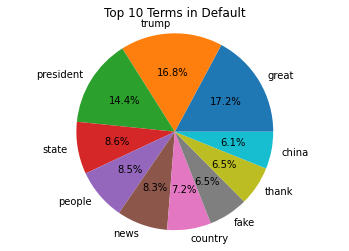

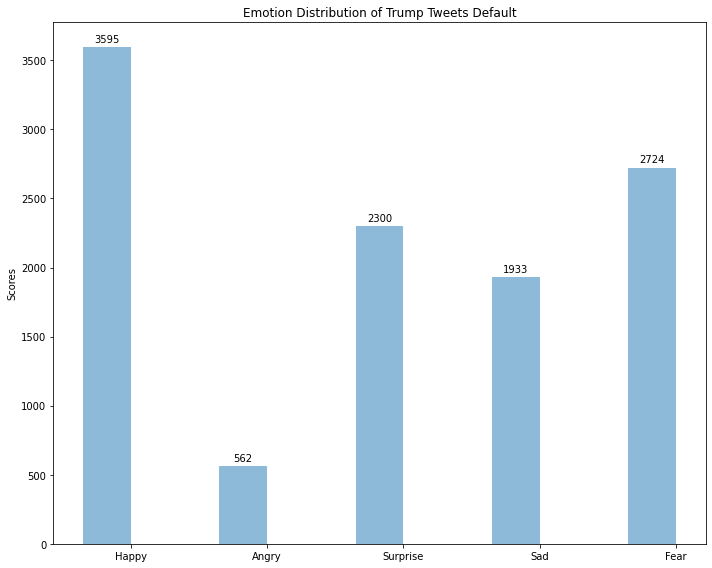

In [73]:
plot_topic_emotion('Default',del_info)

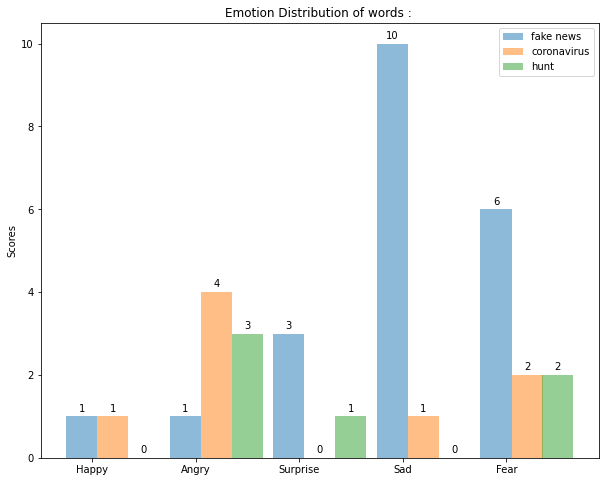

In [74]:
list4 = ['fake news','coronavirus','hunt']
plot_words_emotion(list4,del_tw)

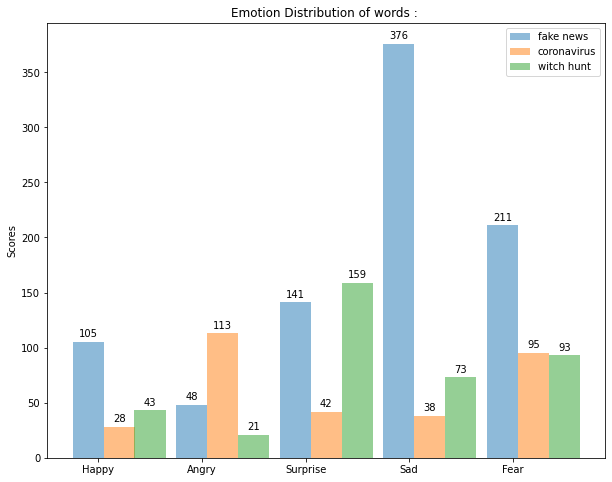

In [75]:
list4 = ['fake news','coronavirus','witch hunt']
plot_words_emotion(list4,clean_tw)

# How you doing after election day?

In [76]:
sorted_tw = trump.sort_values(by='date',ascending=False)

In [77]:
sorted_tw=sorted_tw.loc[(sorted_tw['date'] >= '2020-11-02 00:00:00')]
sorted_tw.head()

,id,text,isRetweet,isDeleted,device,favorites,retweets,date
1091,1324768077939118083,Where are the missing military ballots in Geor...,f,f,Twitter for iPhone,319830,69266,2020-11-06 17:38:17
1090,1324752659996397575,With the attack by the Radical Left Dems on th...,f,f,Twitter for iPhone,256141,45857,2020-11-06 16:37:01
1086,1324750565092610048,....hopefully this will be corrected at the Su...,f,f,Twitter for iPhone,113524,22224,2020-11-06 16:28:42
1085,1324750568817102852,....has been able to render decisions in a mat...,f,f,Twitter for iPhone,102067,19257,2020-11-06 16:28:42
1087,1324750561514848256,"....Legislature. They just ignored that, ignor...",f,f,Twitter for iPhone,53553,13287,2020-11-06 16:28:41


In [78]:
ele_tw = []
for ind in sorted_tw.index:
    ele_tw.append(cleaning(sorted_tw['text'][ind]))    

dtm_tf_ele = tf_vectorizer.fit_transform(ele_tw)
lda_tf.fit(dtm_tf_ele)
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf_ele, tf_vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
3      150.222153  -72.269554       1        1  29.235307
1       51.163364 -159.968018       2        1  28.017087
4      -73.144554   21.523815       3        1  16.324276
2      -66.410133 -110.606438       4        1  15.951999
0       54.417324   12.443444       5        1  10.471330, topic_info=            Term       Freq      Total Category  logprob  loglift
10         state  22.000000  22.000000  Default  15.0000  15.0000
12          vote  52.000000  52.000000  Default  14.0000  14.0000
8   pennsylvania  20.000000  20.000000  Default  13.0000  13.0000
2          biden  31.000000  31.000000  Default  12.0000  12.0000
4          great  16.000000  16.000000  Default  11.0000  11.0000
..           ...        ...        ...      ...      ...      ...
4          great   0.249367  16.835404   Topic5  -4.8193  -1.9558
3            get   0.251431  17.468825   Topic5  -4.8110  -1.9845
1       american   0.248129  18.297258   Topic5  -4.8243  -2.0440
8   pennsylvania   0.249051  20.420956   Topic5  -4.8205  -2.1501
12          vote   0.251014  52.537722   Topic5  -4.8127  -3.0872

[90 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
0         1  0.547420       america
0         3  0.243298       america
0         5  0.182473       america
1         2  0.929101      american
2         2  0.922219         biden
2         5  0.063601         biden
3         1  0.973162           get
4         3  0.950378         great
5         2  0.963672           joe
6         2  0.955318     joe biden
7         1  0.298366      michigan
7         4  0.671323      michigan
8         4  0.930417  pennsylvania
9         1  0.200961     president
9         3  0.803844     president
10        5  0.952011         state
11        3  0.935114         thank
12        1  0.894595          vote
12        4  0.095170          vote
13        4  0.784729           win
13        5  0.142678           win
14        1  0.502062          year
14        2  0.418385          year, R=15, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 5, 3, 1])

In [79]:
ele_vis = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf_ele, tf_vectorizer, mds='tsne')
ele_info = ele_vis.topic_info

In [80]:
ele_info

,Term,Freq,Total,Category,logprob,loglift
10,state,22.000000,22.000000,Default,15.0000,15.0000
12,vote,52.000000,52.000000,Default,14.0000,14.0000
8,pennsylvania,20.000000,20.000000,Default,13.0000,13.0000
2,biden,31.000000,31.000000,Default,12.0000,12.0000
4,great,16.000000,16.000000,Default,11.0000,11.0000
...,...,...,...,...,...,...
4,great,0.249367,16.835404,Topic5,-4.8193,-1.9558
3,get,0.251431,17.468825,Topic5,-4.8110,-1.9845
1,american,0.248129,18.297258,Topic5,-4.8243,-2.0440
8,pennsylvania,0.249051,20.420956,Topic5,-4.8205,-2.1501


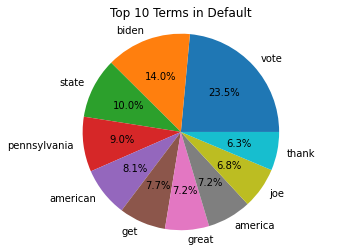

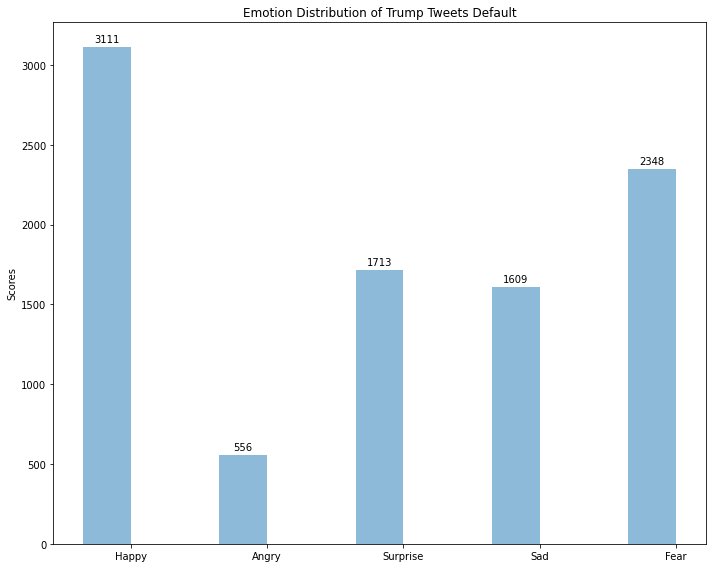

In [81]:
plot_topic_emotion('Default',ele_info)

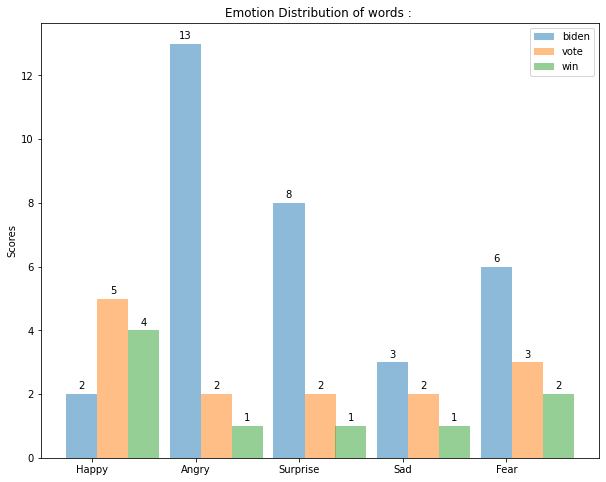

In [82]:
e_list = ['biden','vote','win']
plot_words_emotion(e_list,ele_tw)

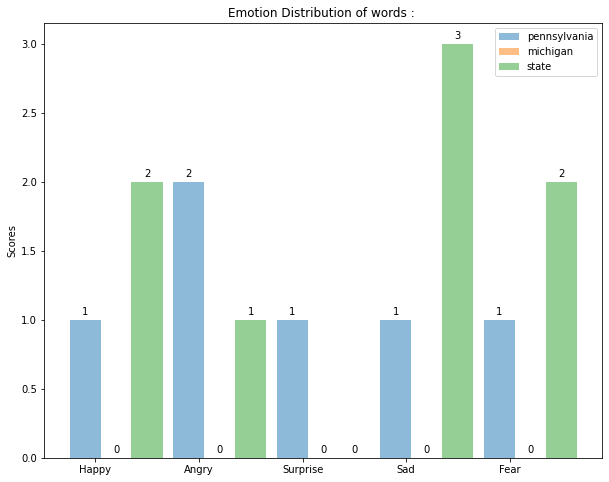

In [83]:
e_list = ['pennsylvania','michigan','state']
plot_words_emotion(e_list,ele_tw)

# NER and Time series analysis of emotions based on Location

In [84]:
#install transformers
!pip install transformers

In [85]:
#check if transformers are working
from transformers import pipeline; print(pipeline('sentiment-analysis')('we love you'))

[{'label': 'POSITIVE', 'score': 0.9998704791069031}]


In [86]:
#install huggingface BERT NER
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)


In [87]:
#install supporting libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [88]:
#one-hot encoded location file
all_loc = pd.read_csv("/content/drive/Shareddrives/256 Project/NER_location.csv")

In [89]:
all_loc.head()

,id,text,date,Unnamed: 3,Charlotte,North Carolina,Florida,China,United States,Sudan,Israel,United Arab Emirates Bahrain,Ohio,New Orleans,Louisiana,America,Gujarat,Arkansas,Seattle,New York,Arizona,Center,Carolina,USA,NYC,Pennsylvania,Indonesia,West Virginia,Texas,Colorado,US,Virginia,Georgia,New York City,Portland,Tel Aviv Jerusalem,Nevada,Oklahoma,Lebanon,Mexico,...,Gulf Coast,St Louis Park,North Carolina States,Washington Monument,AM,New York State York,New Jersey York,Florida Office,Heights,United States Poland,Gulf Oman,Mexico USA,NE,United Kingdom States,Great Lakes,Mars,United States China,Panama City Beach,Rush Dakota,Pleasant Baptist,St Mary Baptist Church Union,Potomac,Sri Lanka,Bethlehem,Arab Republic,Mexico Border,Go Heights,Capitol Hill,Dominican Republic,Jamaica,Saint Lucia,Northwest,Suffolk,China Mexico,San Diego Paso,Wall Country,Southern Border Honduras,Chattanooga Tennessee,White House Garden,Egypt East
0,98454970654916608,Republicans and Democrats have both created ou...,2011-08-02 18:07:48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1234653427789070336,I was thrilled to be back in the Great city of...,2020-03-03 01:34:50,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1218010753434820614,RT @CBS_Herridge: READ: Letter to surveillance...,2020-01-17 03:22:47,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,2020-09-12 20:10:58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1218159531554897920,RT @MZHemingway: Very friendly telling of even...,2020-01-17 13:13:59,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
#download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
#removal of stop words and converting upper case words to title case
def removing_stopwords_NER(text):
    stop_words = set(stopwords.words('english'))
    stop = [x.lower() for x in stop_words]
    word_token = []
    for word in text.split(" "):
      if not word.lower() in stopwords.words():
        if word.isupper() and len(word) > 3:
          word_token.insert(0,word.capitalize())
        else:
          word_token.insert(0,word)
    return [word for word in text.split(" ") if not word.lower() in stopwords.words()]

In [92]:
def NER_Detector(raw_tweet):
  locations = []
  no_dot_tweet = re.sub(r'\.', '', raw_tweet)
  tweet_after_words_list = removing_stopwords_NER(no_dot_tweet)
  #removing links, hrefs, hashtags and links
  final_tweet = re.sub(r'http\S+|www.\S+|#\S+|@\S+', '', ' '.join(tweet_after_words_list))
  #getting NER results
  ner_results = nlp(final_tweet)
  stack = []
  #using stack datastructures to combine locations
  for x in ner_results:
    if x['score'] > 0.98 and (x['entity'] == "B-LOC" or x['entity'] == "I-LOC"):
      if (x['entity'] == "B-LOC" and len(stack) == 0) or x['entity'] == "I-LOC":
        stack.insert(0,x['word'])
      elif x['entity'] == "B-LC" and len(stack) > 0:
        y = ""
        while len(stack) > 0:
          z = stack.pop()
          y = y + z + " "
        stack.insert(0,x['word'])
        locations.insert(0,y)
  y = ""
  while len(stack) > 0:
    z = stack.pop()
    y = y+z+" "     
  locations.insert(0,y)
  return locations

In [93]:
# method used to make analysis from the words
def getAnalysis(tweetloc):
  #get all locations from tweets
  for x in tweetloc:
    #partial match locations from tweets and get text and date from tweets
    match_col = all_loc.columns.to_series().str.contains(x) | all_loc.columns.to_series().str.contains("text") | all_loc.columns.to_series().str.contains("date")
    #get columns
    selected_locations = all_loc[all_loc.columns[match_col]]
    selected_locations['result'] = selected_locations.iloc[:,2]
    #check if location is present
    for i in range(3,selected_locations.shape[1]-1):
      selected_locations['result'] += selected_locations.iloc[:,i] 
    final_NER = selected_locations[selected_locations.result > 0]
    for emotion in ['Happy','Angry','Surprise','Sad','Fear']:
      final_NER[emotion] = 0
    for label, row in final_NER.iterrows():
      #get emotions for all the tweets
      for emotion, value in get_emotion(row["text"]).items():
        final_NER.loc[final_NER["date"] == row["date"], emotion] = value
    final_NER['new_date'] = pd.to_datetime(final_NER['date'])
    plotFrame = final_NER[['new_date','Angry','Happy','Sad','Surprise','Fear']]
    date_form = DateFormatter("%Y")
    
    #plot time series graphs for locations
    colors = ['b', 'r', 'g', 'y', 'c']
    fig, ax = plt.subplots(nrows = 5, ncols =1,figsize=(15, 10))
    ax[0].plot(plotFrame.sort_values(by='new_date')['new_date'], plotFrame['Angry'], 'r')
    ax[0].set_title("Angry",fontsize='12', color='black')
    ax[0].get_xaxis().set_visible(False)
    ax[1].plot(plotFrame.sort_values(by='new_date')['new_date'], plotFrame['Happy'], 'b')
    ax[1].set_title("Happy",fontsize='12', color='black')
    ax[1].get_xaxis().set_visible(False)
    ax[2].plot(plotFrame.sort_values(by='new_date')['new_date'], plotFrame['Sad'], 'y')
    ax[2].set_title("Sad",fontsize='12', color='black')
    ax[2].get_xaxis().set_visible(False)
    ax[3].plot(plotFrame.sort_values(by='new_date')['new_date'], plotFrame['Surprise'], 'g')
    ax[3].set_title("Surprise",fontsize='12', color='black')
    ax[3].get_xaxis().set_visible(False)
    ax[4].plot(plotFrame.sort_values(by='new_date')['new_date'], plotFrame['Fear'], 'c')
    ax[4].set_title("Fear",fontsize='12', color='black')
    ax[4].xaxis.set_major_formatter(date_form) 
    fig.suptitle(x, fontsize=20) 
    plt.show()

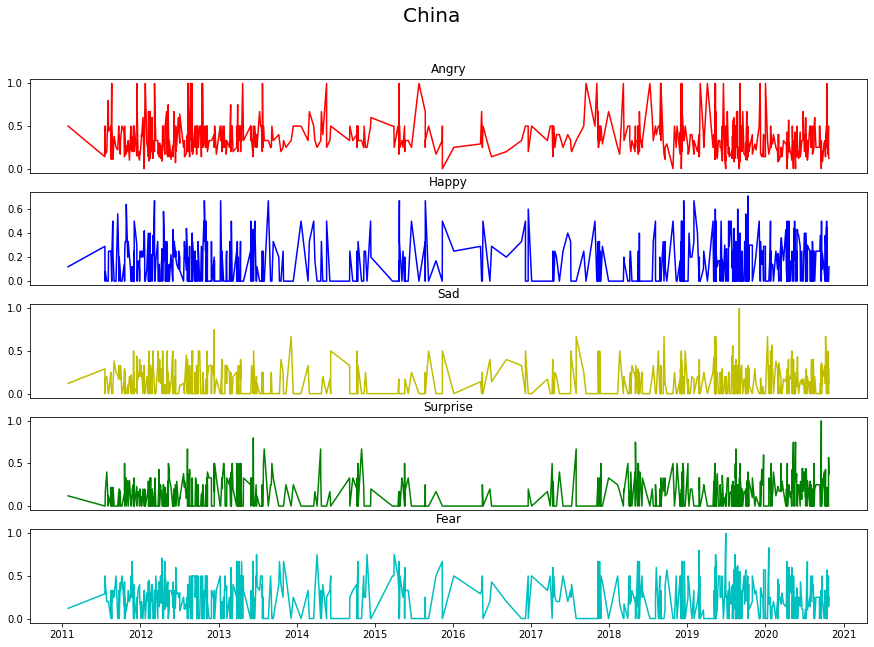

In [94]:
#Timeseries analysis for China
tweetloc = NER_Detector("European Countries are sadly getting clobbered by the China Virus. The Fake News does not like reporting this!")
getAnalysis(tweetloc)

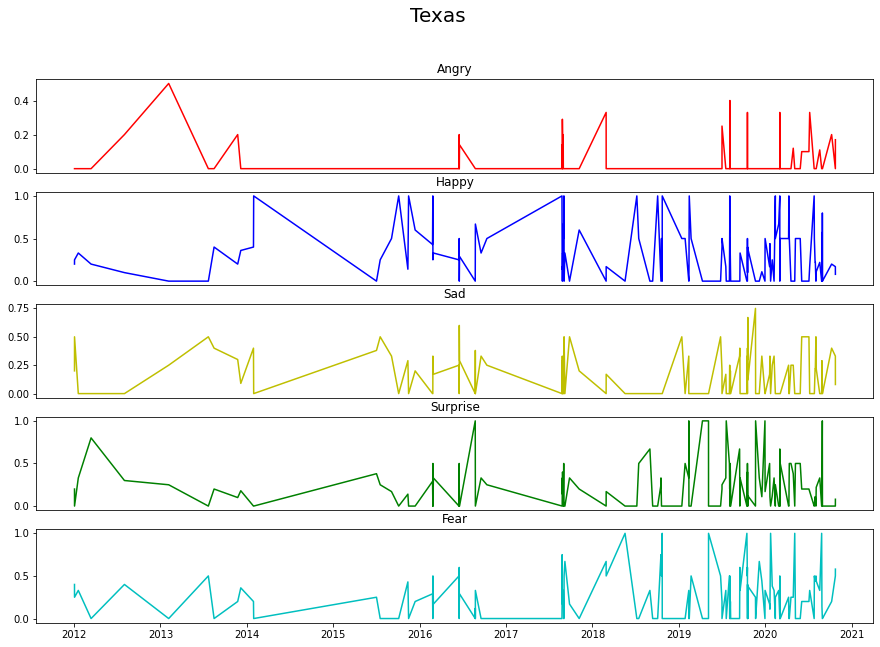

In [95]:
#Timeseries analysis for Texas
tweetloc = NER_Detector("...owned Dominion Voting Systems, turned down by Texas and many others because it was not good or secure, those responsible for the safeguarding of our Constitution cannot allow the Fake results of the 2020 Mail-In Election to stand. The World is watching!")
getAnalysis(tweetloc)